## Basics of Computer Visualisation

In [31]:
# Necessairy imports:
import numpy as np
import skimage
import skimage.io
import skimage.data
import ipywidgets as ipw
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"] = (1.5,1.5)

(512, 512)
uint8


Text(0.5, 1.0, 'Image in utf8')

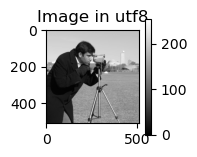

In [32]:
# Importing image (! UTF8 wraps around)
im = skimage.data.camera()
print(im.shape) # Are 2D Arrays where each entry is a row with the amount of columns
print(im.dtype)

# Displaying the image: 
plt.imshow(im, vmin=0, vmax=255, cmap="gray")
plt.colorbar()
plt.title("Image in utf8")

Text(0.5, 1.0, 'Image in float')

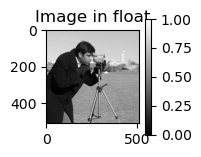

In [33]:
# Displaying the image in float
im_float = im/255
plt.imshow(im_float, vmin=0, vmax=1, cmap="gray")
plt.colorbar()
plt.title("Image in float")

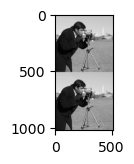

In [34]:
# Vertical Stacking 
plt.imshow(np.vstack((im_float,im_float)), cmap="gray", vmin=0, vmax=1)

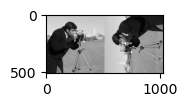

In [35]:
# Horizontal Stacking:
plt.imshow(np.hstack((im_float, im_float.T)),vmin=0,vmax=1, cmap="gray")

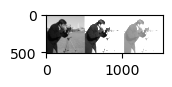

In [36]:
# Changing the brightness and Contrast of an Image:
# (Multiplication * changes contrast and + adds brightness)
plt.imshow(np.hstack((
    im_float, 
    im_float * 2,
    im_float + 0.5,
)), vmin=0, vmax=1, cmap="gray")

In [40]:
# Using a slider to change the contrast & brightness
@ipw.interact(brightness=ipw.FloatSlider(min=-1,max=+1, value=0),
             contrast = ipw.FloatSlider(min=-1, max=+3, value=1))
def f(brightness,contrast):
    """Allows to change brightness and contrast"""
    plt.imshow(np.hstack((
        im_float,
        (im_float - 0.5) * contrast + 0.5 + brightness
    )), cmap="gray", vmin=0, vmax=1);
    

interactive(children=(FloatSlider(value=0.0, description='brightness', max=1.0, min=-1.0), FloatSlider(value=1…

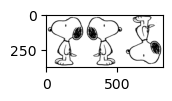

In [45]:
# Image Mirrored, Flipped and Cropped:
snoopy = skimage.io.imread("Data/snoopy.png")
snoopy_mirrored = snoopy[:,::-1]
snoopy_flipped = snoopy[::-1,:]

plt.imshow(np.hstack((
    snoopy,
    snoopy_mirrored,
    snoopy_flipped,    
)),vmin=0,vmax=255,cmap="gray")

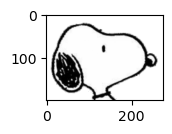

In [51]:
# Cropping Images: Head Crop 1)
snoopy_head_mirror = snoopy[0:200,::-1]
plt.imshow(snoopy_head_mirror,cmap="gray",vmax=255,vmin=0)

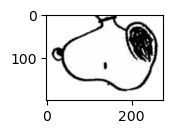

In [53]:
# Cropping Images: Head Crop 2)
plt.imshow(snoopy[200:0:-1,:],vmax=255,vmin=0,cmap="gray")

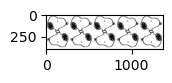

In [60]:
# Combine the two heads:
im = skimage.io.imread("data/snoopy.png")
ims = []

for i in range(1,6):
    ims.append(np.vstack((
        snoopy[0:200,::-1],
        snoopy[200:0:-1,:]
    )))


plt.imshow(np.hstack(ims),
           vmin=0, vmax=255, cmap="gray")

(400, 600, 3) uint8


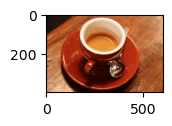

In [64]:
# Color Images:
im = skimage.data.coffee()
print(im.shape,im.dtype)
plt.imshow(im)

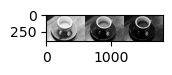

In [65]:
# Show the different color channels:
im_red = im[:,:,0]
im_green = im[:,:,1]
im_blue = im[:,:,2]

plt.imshow(np.hstack((
    im_red,
    im_green,
    im_blue
)), vmin=0, vmax=255, cmap="gray")

In [71]:
# Handling Video Data:
ims = []
for i in range(1,43):
    ims.append(skimage.io.imread(f"data/video_frames/{i:08d}.png"))
ims = np.array(ims)
print(ims.shape)

@ipw.interact(i=ipw.IntSlider(min=0,max=len(ims)-1))
def f(i):
    plt.imshow(ims[i])

(42, 144, 180, 3)


interactive(children=(IntSlider(value=0, description='i', max=41), Output()), _dom_classes=('widget-interact',…

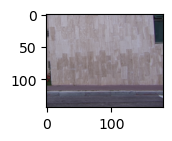

In [73]:
# Extract the background from an image: Can be done using the median 
background = np.median(ims, axis=0) # Use the image axis
plt.imshow(background.astype("uint8"))

In [80]:
# Extract the foreground from an image:

@ipw.interact(i=ipw.IntSlider(min=0,max=len(ims)-1))
def f(i):
    # Calculates the abs difference between img and background = foreground
    difference = ims[i].astype(float)-background.astype(float)
    difference_abs = np.abs(difference)
    print(difference_abs.shape)
    
    difference_sum = np.sum(difference_abs, axis=2)
    print
    # we now have a single channel, i.e. a 2d array (sums up the 3 channels into 1)
    
    plt.imshow(difference_sum, vmin=0, vmax=80)

interactive(children=(IntSlider(value=0, description='i', max=41), Output()), _dom_classes=('widget-interact',…

## Binarization & Component Analysis

In [83]:
import numpy as np
import skimage
import skimage.io
import skimage.data
import ipywidgets as widgets
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams["figure.figsize"] = (2,2)

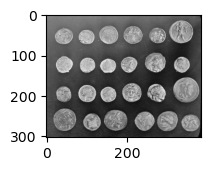

In [84]:
# Read the coin data and display:
im = skimage.data.coins()
im = skimage.img_as_float(im)
plt.imshow(im, vmin=0, vmax=1, cmap="gray")

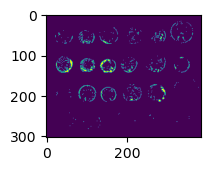

In [86]:
# Binarisation Mask: Either the values are True = Bright or False=Dark
mask = im > 0.8 # Is a threshhold
plt.imshow(mask)

In [87]:
# Find a better Threshhold:
@widgets.interact(threshold = (0,1,0.01))
def f(threshold):
    mask = im > threshold
    plt.imshow(mask)

interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

A **connected component** refers to a group of adjacent True values in a mask. These groups or "islands" are **labeled** distinctly, while the background is labeled as 0. Each group represents a set of neighboring elements that share the same value

In [89]:
# Find the connected components (Islands)
import skimage.measure
labels = skimage.measure.label(im > 0.5) # Threshold value 0.5 (for float)
print(labels.shape, labels.dtype)
print("Unique values in labels:", np.unique(labels))

# Display the different labels:
@widgets.interact(label = list(np.unique(labels)))
def f(label):
    print(f"The connected component with label {label} contains {np.sum(labels == label)} pixels")
    plt.imshow(labels == label)

(303, 384) int32
Unique values in labels: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]


interactive(children=(Dropdown(description='label', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

We can use the `regiongroups`function to find larger areas:
- `area`: Number of pixels in the region
- `bbox`: tuple Bounding Box (min_row, min_col, max_row, max_col)
- `centroid`: Is the center of the region

In [91]:
# Find the larger regions (labels and then get regions of certain area)
import skimage.measure
labels = skimage.measure.label(im > 0.5) # Threshold value 0.5 (for float)
regions = skimage.measure.regionprops(labels)
large_regions = [r for r in regions if r.area > 100]
print(f"There are {len(large_regions)} large regions")

There are 25 large regions


In [93]:
# Draw the regions around the coins:
import matplotlib.patches as patches

@widgets.interact(threshhold = (0,1,0.01) , minsize = (10,500))
def f(threshhold,minsize):
    labels = skimage.measure.label(im > threshhold)
    regions = skimage.measure.regionprops(labels)
    large_regions = [r for r in regions if r.area > minsize]

    
    fig, ax = plt.subplots()
    ax.imshow(im, cmap="gray")
    
    for r in large_regions:
        (min_row, min_col, max_row, max_col) = r.bbox
        width = max_col - min_col
        height = max_row - min_row
        rect = patches.Rectangle((min_col,min_row),width,height,
                                     linewidth=1,edgecolor='b',facecolor='none')
        ax.add_patch(rect)
    


interactive(children=(FloatSlider(value=0.0, description='threshhold', max=1.0, step=0.01), IntSlider(value=25…

In [ ]:
threshold = 0.51
minsize = 285
labels = skimage.measure.label(im > threshold)
regions = skimage.measure.regionprops(labels)
large_regions = [r for r in regions if r.area > minsize]

for i,r in enumerate(large_regions):
    (min_row, min_col, max_row, max_col) = r.bbox
    coinim = im[min_row:max_row, min_col:max_col]
    # Convert coinim to uint8 format
    coinim_uint8 = (coinim * 255).astype(np.uint8)
    # fig,ax = plt.subplots()
    # ax.imshow(coinim) Would display 
    # skimage.io.imsave(f"{i:05d}.png",coinim_uint8) Would save

## Local Filtering & Edge Detection

In [118]:
import numpy as np
import skimage
import skimage.io
import skimage.data
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams["figure.figsize"] = (2,2)
import ipywidgets as widgets 

(512, 512)
uint8


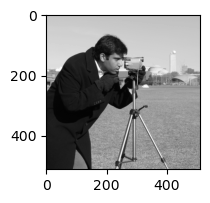

In [119]:
# Load the greyscale image: 
im = skimage.data.camera()
print(im.shape)
print(im.dtype)
plt.imshow(im,cmap="gray")

**Local Filtering**: The intensity value of the output image one pixel (top) is a function of the (bottom) 3x3 grid. The value of the output (top) pixel depends on a _neighborhood_ of that pixel in the input image.
<img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif" width="100">
We may want to have the output to be the same size as the input $\rightarrow$ we use padding. 

<img src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/same_padding_no_strides.gif" width="100">

**Linear Filtering (Convolution)**
We can use a kernel to convolve our image. It is the **moving weighted average**.
A kernel goes over an image (stride). The product is then taken for each element of the kernel and the image. 
* If the input has $i$ rows and the kernel has $k$ rows. the output will have $i-k+1$ rows

In [120]:
# Using Padding: Adding zeros around the edges 
import scipy
a = np.array([   [3,3,2,1,0],
                 [0,0,1,3,1],
                 [3,1,2,2,3],
                 [2,0,0,2,2],
                 [2,0,0,0,1]])

k = np.array([   [0,1,2],
                 [2,2,0],
                 [0,1,2]])
# Adds zeros around the image 
scipy.ndimage.convolve(a, k[::-1,::-1], mode='constant', cval=0.0)


array([[ 6, 14, 17, 11,  3],
       [14, 12, 12, 17, 11],
       [ 8, 10, 17, 19, 13],
       [11,  9,  6, 14, 12],
       [ 6,  4,  4,  6,  4]])

**Box Filter**: Is a filter that averages all values in the section of the kernel (square). A larger box filter will lead to more blurring. 

In [121]:
# Applying a Box Filter of different sizes 1x1 - 20x20
im = skimage.img_as_float(skimage.data.camera())
@widgets.interact(sz = (1,21,2))
def f(sz):
    # Mean division for box filter:
    k = np.full((sz,sz), 1/(sz*sz))
    # Convolution of image with box filter
    imf = scipy.ndimage.convolve(im,k[::-1,::-1], mode="constant", cval=0.0)
    plt.imshow(imf, cmap="gray", vmin=0, vmax=1)
    

interactive(children=(IntSlider(value=11, description='sz', max=21, min=1, step=2), Output()), _dom_classes=('…

**Smoothing Filters (Gaussian) Filters**: Here we do not consider all pixels equally around the neighbourhood. Instead we use a weighted average (more weights in the central pixels). 
* The variance $\sigma$ determines the amount of smoothing -> larger $\sigma$ = more blurring (larger central pixels)

In [122]:
# Gaussian Filter with different Sigmas:
im = skimage.img_as_float(skimage.data.camera())
@widgets.interact(sigma = (1,21,2))
def f(sigma):
    imf = skimage.filters.gaussian(im, sigma=sigma, mode='constant', cval=0.0)
    plt.imshow(imf, cmap="gray", vmin=0, vmax=1)

interactive(children=(IntSlider(value=11, description='sigma', max=21, min=1, step=2), Output()), _dom_classes…

**Edge Detection in 1D**

In [123]:
# We create a 1D Signal with noise 
@widgets.interact(amount=(0.0,1.0,0.01))
def f(amount):
    # Signal with 0 and 1 -> Should have an edge
    a = np.array([([0.0]*100) + ([1.0]*100)])
    an = a + np.random.randn(1,200) * amount

    # Define the 1D Kernel for Edge detction
    kernel = np.array([[-1.0,1.0]])
    ad = scipy.ndimage.convolve(an,kernel[::-1,::-1])
    
    fig, axs = plt.subplots(nrows=2,ncols=1)
    axs[0].plot(an[0,:])
    axs[1].plot(ad[0,:]);

interactive(children=(FloatSlider(value=0.5, description='amount', max=1.0, step=0.01), Output()), _dom_classe…

In [124]:
# 1D Edge Detection with Box Filter:
@widgets.interact(noise_amount=(0.0,1.0,0.01),
                  box_length=(1,21,2))
def f(noise_amount, box_length):
    # Box Filter:
    a = np.array([([0.0]*100) + ([1.0]*100)])
    an = a + np.random.randn(1,200) * noise_amount
    box = np.full((1,box_length),1)/box_length
    anf = scipy.ndimage.convolve(an,box[::-1,::-1])

    # Edge Detection:
    kernel = np.array([[-1.0,1.0]])
    an_g = scipy.ndimage.convolve(an,kernel[::-1,::-1])
    anf_g = scipy.ndimage.convolve(anf,kernel[::-1,::-1])
    fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,5))
    axs[0,0].plot(an[0,:]), axs[0,0].set_title("original")
    axs[0,1].plot(anf[0,:]), axs[0,1].set_title("filtered")
    axs[1,0].plot(an_g[0,:]), axs[1,0].set_title("original grad")
    axs[1,1].plot(anf_g[0,:]), axs[1,1].set_title("filtered grad")

interactive(children=(FloatSlider(value=0.5, description='noise_amount', max=1.0, step=0.01), IntSlider(value=…

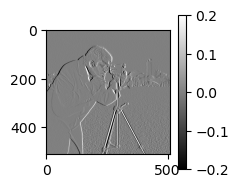

In [125]:
# Computing the Edges in 2D Images:

# Loading Image and adding noise: 
im = skimage.data.camera()
im = skimage.img_as_float(im)
im_n = im + np.random.randn(im.shape[0], im.shape[1]) * 0.01

# Defining the kernel 
h_kernel = np.array([[-1,+1]])

# Convolve the image:
im_gh = scipy.ndimage.convolve(im_n, h_kernel[::-1,::-1], mode='constant', cval=0.0)
plt.imshow(im_gh, vmin=-0.2, vmax=+0.2, cmap="gray")
plt.colorbar()

**Sobel Operator**: We can use this instead of the finite difference kernel: $\mathbf{G}_x=\left[\begin{array}{ccc}-1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1\end{array}\right] * \mathbf{A} \quad$ and $\quad \mathbf{G}_y=\left[\begin{array}{ccc}-1 & -2 & -1 \\ 0 & 0 & 0 \\ +1 & +2 & +1\end{array}\right] * \mathbf{A}$

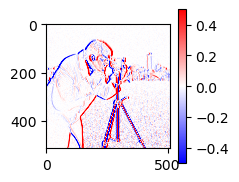

In [126]:
sobel_h = np.array([[-1, 0, +1],[-2, 0, +2],[-1, 0, +1]])
sobel_v = sobel_h.T

# Loading Image and adding noise: 
im = skimage.data.camera()
im = skimage.img_as_float(im)
im_n = im + np.random.randn(im.shape[0], im.shape[1]) * 0.01

# Convolve horizontal sobel: 
im_gh = scipy.ndimage.convolve(im_n, sobel_h[::-1,::-1], mode='constant', cval=0.0)
plt.imshow(im_gh, vmin=-0.5, vmax=+0.5, cmap="bwr")
plt.colorbar()

We want to detect edges in all directions (horizontal & vertical). We take the square root of the sum of their squars to obtain the modulo of the gradient:

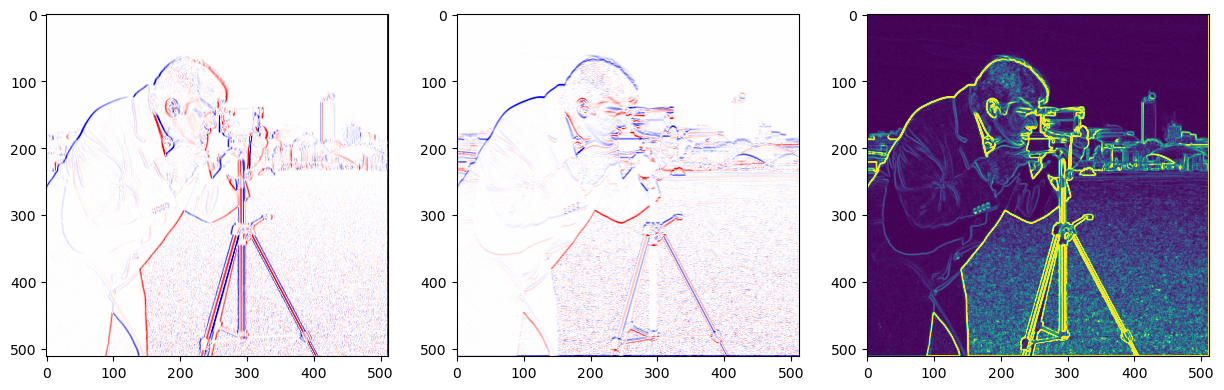

In [127]:
# Horizontal and Vertical Sobel Operator + Sqrt of sum of squares:
im_sobelh = scipy.ndimage.convolve(im, sobel_h[::-1,::-1], mode='constant', cval=0.0)
im_sobelv = scipy.ndimage.convolve(im, sobel_v[::-1,::-1], mode='constant', cval=0.0)
im_sobel = (im_sobelh ** 2 + im_sobelv ** 2) ** 0.5

fig, axs = plt.subplots(ncols=3, figsize=(15,6))
axs[0].imshow(im_sobelh, vmin=-2, vmax=+2, cmap="bwr")
axs[1].imshow(im_sobelv, vmin=-2, vmax=+2, cmap="bwr")
axs[2].imshow(im_sobel,  vmin=0, vmax=+1, cmap="viridis")

**Canny Edge Detection**
Multi-Stage Edge Detector - Uses filters based on the derivative of a Gaussian in order to compute the intensity of the gradients:
1. We smooth the image with Gaussian Filter
   * `sigma` A floating point number representing the standard deviation of the Gaussian filter that is used in the algorithm. 
3. Compute the Image gradient with sobel
4. Find gradient magnitute at each pixel and thin out the edges to 1 pixel
`low_threshold` and `high_threshold`:
Edges with intensity gradients greater than high_threshold are immediately considered as "strong edges".Edges with intensity gradients less than low_threshold are immediately discarded.



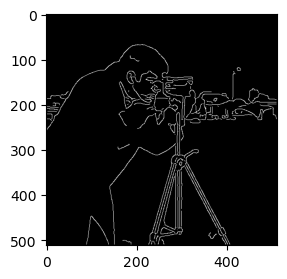

In [128]:
import skimage.feature
im_edges = skimage.feature.canny(im, sigma=2)
fig, ax = plt.subplots(figsize=(3,3))
ax.imshow(im_edges, cmap="gray")

In [130]:
# Applied to coins data (threshold and sigma values)
im = skimage.img_as_float(skimage.data.coins())

@widgets.interact(sigma=(0.0,4.0),
                  low_threshold=(0.0,1.0,0.01),
                  high_threshold=(0.1,1.0,0.01))

def f(sigma, low_threshold, high_threshold):
    im_edges = skimage.feature.canny(im, sigma=sigma, 
                    low_threshold=low_threshold, high_threshold=high_threshold)
    
    fig, axs = plt.subplots(ncols=2, figsize=(15,10))
    axs[0].imshow(im, cmap="gray")
    axs[1].imshow(im_edges)

interactive(children=(FloatSlider(value=2.0, description='sigma', max=4.0), FloatSlider(value=0.5, description…

this is our structuring element (neighborhood)
[[1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]]


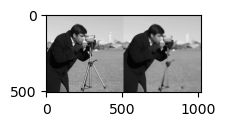

In [131]:
# Compute the median of values in the neightbourhood (Reduces salt and peper noise)
# Uses a structuring element for this 
import skimage.filters
import skimage.morphology
selem = skimage.morphology.square(11)
print("this is our structuring element (neighborhood)")
print(selem)
im = skimage.data.camera()
imf = skimage.filters.median(im, selem)
plt.imshow(np.hstack((im,imf)), cmap="gray")

this is our structuring element (neighborhood)
[[1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]


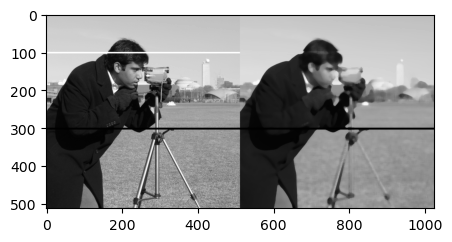

In [133]:
# Can be helpfull with images containinmg white lines
import skimage.filters
import skimage.morphology
selem = skimage.morphology.square(9)
print("this is our structuring element (neighborhood)")
print(selem)
im = skimage.data.camera()
imo = im.copy()
imo[100:104,:] = 255
imo[300:305,:] = 0
imf = skimage.filters.median(imo, selem)
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(np.hstack((imo,imf)), cmap="gray")

## Hough Transform 
We know now how to find the edges (for example with Cany). However how can we find the actial elelemts, only part of the model is visible and what about noise.

**Line Detection**
We can create a line in image space and parameter space. We know $x_i$ and $y_i$ are known. A point in the Image space gives a line in parameter space. This represents all lines that can go through that point ($x_i,y_i$). The intersection gives us ($m$ and $c$).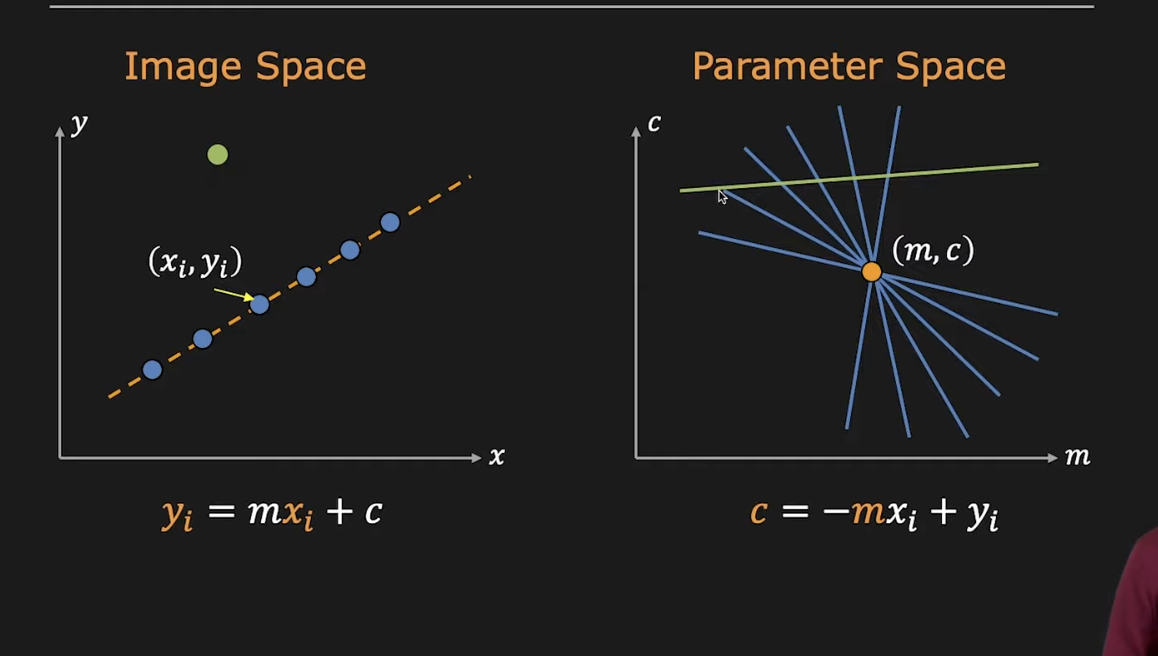

*Line Detection Algorithm*
1. Create a parameter space ($m$,$c$)
2. Create *accumulator array* $A(m,c)$ & set all cells = 0 This is param space
3. For each edge point $\left(x_i, y_i\right)$,
$$
A(m, c)=A(m, c)+1
$$
if $(m, c)$ lies on the line: $c=-m x_i+y_i$
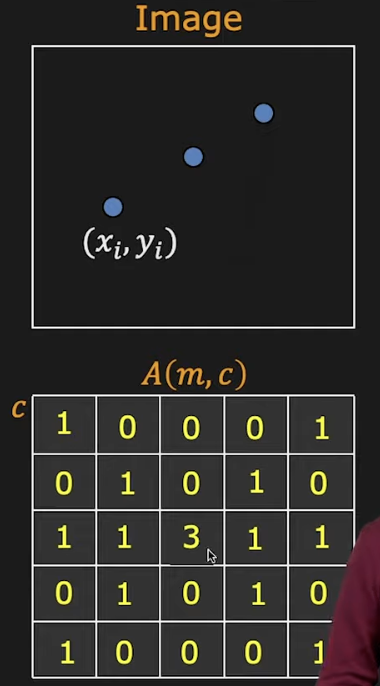

In [134]:
import skimage.feature
import skimage.transform.hough_transform as ht
import matplotlib.pyplot as plt 
import numpy as np
import ipywidgets as widgets

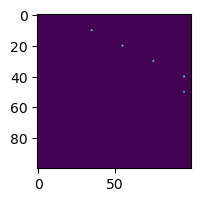

In [135]:
# Creating a syntetic image with points
im = np.zeros((100,100))
im[10,35] = 1
im[20,55] = 1
im[30,75] = 1
im[40,95] = 1
im[50,95] = 1

imedges = im
plt.imshow(imedges)

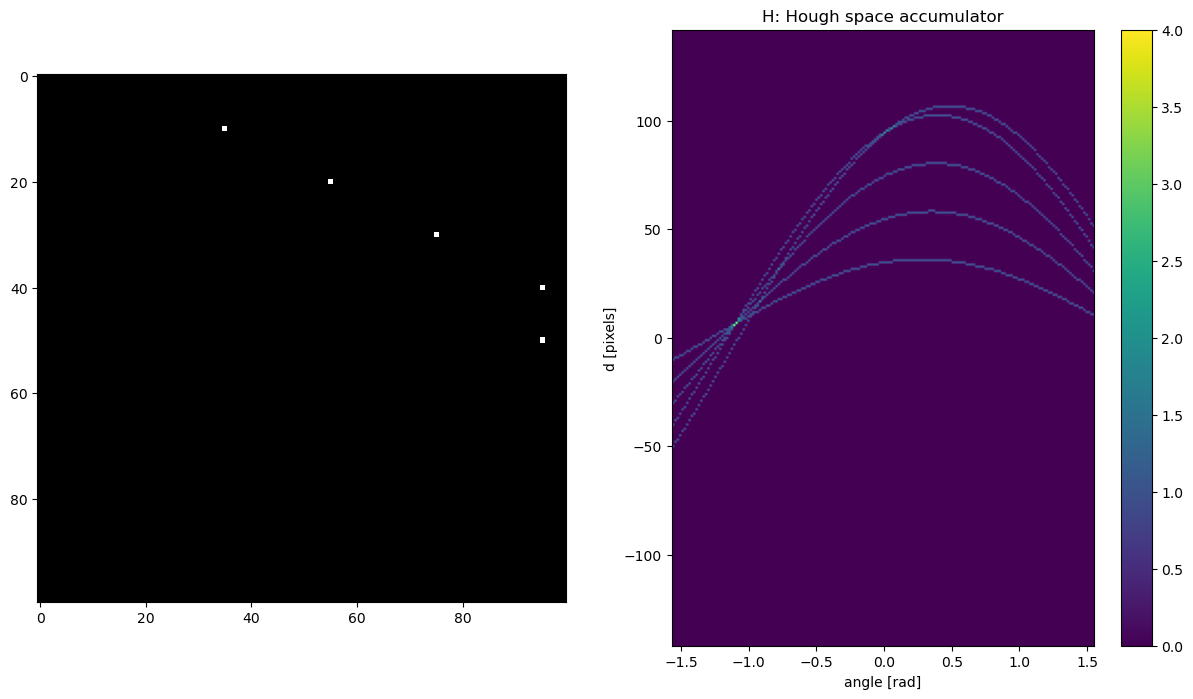

In [143]:
# Applying Hough Transform

# Define the drawing: 
fig,(ax0,ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15,8))

# Hough Transform goes here:
H,angles,distances = ht.hough_line(imedges)


# Draws the Hough space:
ax0.imshow(imedges, cmap="gray")
Himage = ax1.imshow(H,
                    extent=(angles[0],angles[-1],distances[0],distances[-1]),
                    origin="lower", aspect="auto")
ax1.set(xlabel="angle [rad]",
        ylabel="d [pixels]",
        title="H: Hough space accumulator");
plt.colorbar(Himage)

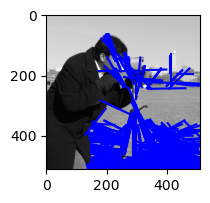

In [155]:
# Try it over a real image:
import skimage.data
import skimage.feature
im = skimage.data.camera()
# Applying Cany:
imedges = skimage.feature.canny(im)

# Different function for line dection
lines = ht.probabilistic_hough_line(imedges,
                                    threshold=100)
len(lines)

# Draw the image and lines:
fig,ax = plt.subplots(figsize=(2,2))

ax.imshow(im,cmap="gray")
for ((x0,y0),(x1,y1)) in lines:
    ax.plot([x0,x1],[y0,y1],'b-')

In [157]:
# We have a lot of clutter so lets tweak it a bit:
@widgets.interact(canny_sigma=(0.0,6.0,0.1),
                  canny_low_threshold=(0.00,0.4,0.01),
                  canny_high_threshold=(0.00,0.4,0.01),
                  hough_threshold=(10,200,20))
def f(canny_sigma, canny_low_threshold, canny_high_threshold, hough_threshold):
    imedges = skimage.feature.canny(skimage.img_as_float(im),
                                    low_threshold=canny_low_threshold,
                                    high_threshold=canny_high_threshold,
                                    sigma=canny_sigma)
    lines = ht.probabilistic_hough_line(imedges,
                                        threshold=hough_threshold,
                                        seed=0)
    fig,(ax0,ax1) = plt.subplots(ncols=2, figsize=(15,8))
    ax0.imshow(im,cmap="gray")
    for ((x0,y0),(x1,y1)) in lines:
        ax0.plot([x0,x1],[y0,y1],'b-')
    ax1.imshow(imedges,cmap="gray")


interactive(children=(FloatSlider(value=3.0, description='canny_sigma', max=6.0), FloatSlider(value=0.2, descr…

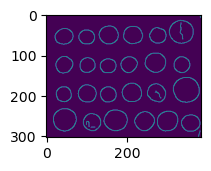

In [161]:
# Applying it to circles:
im = skimage.data.coins()
imedges = skimage.feature.canny(im, sigma=3)
plt.imshow(imedges)

# We search now for circles with radius 15-35 pixels:
radii = np.arange(15,35)
H = ht.hough_circle(imedges, radii)
maxvotes = np.max(H)

In [162]:
!python3 -m pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/de/ea/90267db2c02fb61f4d03b9645c7446d3cbca6d5c08522e889535c88edfcd/tensorflow-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.14.0 from https://files.pythonhosted.org/packages/d3/4b/ae9037ea22ba94eb2cf267e991384c3444f3e6142fa49923352b4ab73e14/tensorflow_macos-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.0 MB/s eta 0:00:00a 0:00:01
  Obtaining depen